# Importing necessory libraries

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Loading Images data

In [2]:
f = h5py.File('faceimages.mat','r')
data = f.get('data')
data = np.array(data)

# Preprocessing Data

In [3]:
labels=[]
X=[]
for i in range(400):
    labels.append(data[-1,i])
    X.append(list(data[:-1,i]))
    
X=np.array(X)
print("X matrix's shape",X.shape)

X matrix's shape (400, 10304)


# Mean centering the data

In [4]:
means=[]
for i in range(10304):
    s=sum(X[:,i])
    means.append(s/400)
A=[]
for i in range(10304):
    s=list(np.subtract(X[:,i],means[i]))
    A.append(s)
A=np.array(A)

# Building Covariance Matrix

In [5]:
print('A matrix shape:',A.shape)

AT=np.transpose(A)
#print(AT.shape)

C=np.dot(A,AT)
print('Covariance Matrix Shape: ',C.shape)

A matrix shape: (10304, 400)
Covariance Matrix Shape:  (10304, 10304)


# Reducing Dimensions or Solving the eigen value equation

In [21]:
w, v = np.linalg.eig(C) 
w=np.real(w)
v=np.real(v)
idx = w.argsort()[::-1]   
eigenValues = w[idx]
eigenVectors = v[:,idx]
reducedW=eigenVectors[:,:1000]
print('Reduced Weight Matrix Shape: ',reducedW.shape)
print('X transpose Shape: ',X.transpose().shape)

Reduced Weight Matrix Shape:  (10304, 1000)
X transpose Shape:  (10304, 400)


# Reduced Dimensions of images

In [22]:
final=np.dot(reducedW.transpose(),X.transpose())
print("Reduced Dimensions: ",final.shape)

Reduced Dimensions:  (1000, 400)


# Plotting the Energy Curve

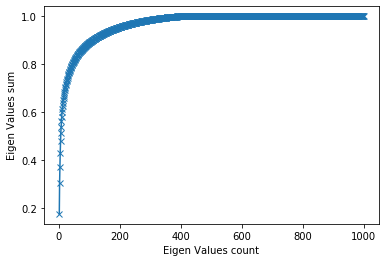

In [23]:
ev_sum=sum(eigenValues)
energy=[]
for i in range(10304):
    energy.append(sum(eigenValues[0:i+1])/ev_sum)
    
plt.plot(np.linspace(1,1000,1000),energy[:1000],marker='x')
plt.xlabel('Eigen Values count')
plt.ylabel('Eigen Values sum')
plt.show()

# Image reconstruction and calculating reconstruction error

In [24]:
errors=[]
for i in [5,10,50,100,500,1000,5000,10000]:
    reducedW=eigenVectors[:,:i]
    final=np.dot(reducedW.transpose(),X.transpose())
    recovered=np.dot(final.transpose(),reducedW.transpose())
    error=0
    for j in range(400):
        for x in range(10304):
            recovered[j,x]=recovered[j,x]+means[x]
            error+=abs(recovered[j,x]-X[j,x])
    print('Principal Componants Considered:',i)
    print('Average Error:',error/4121600,'\n\n')
    errors.append(error/4121600)

Principal Componants Considered: 5
Average Error: 102.21417189498374 


Principal Componants Considered: 10
Average Error: 105.84525050912832 


Principal Componants Considered: 50
Average Error: 109.70524593688896 


Principal Componants Considered: 100
Average Error: 110.53728419514863 


Principal Componants Considered: 500
Average Error: 111.3681620416001 


Principal Componants Considered: 1000
Average Error: 111.39969694992936 


Principal Componants Considered: 5000
Average Error: 111.65247669918176 


Principal Componants Considered: 10000
Average Error: 112.00429461141147 




# Average Reconstruction Error graph

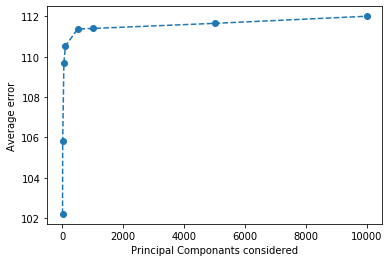

In [25]:
plt.plot([5,10,50,100,500,1000,5000,10000],errors, marker='o', linestyle='dashed')
plt.xlabel('Principal Componants considered')
plt.ylabel('Average error')
plt.show()

# Observations

1. Some of the Eigen values and Eigen vectors were complex in nature but due to that fact there complex was too small so I ignored it and only took the real part.
2. Although other approach we can take to deal with complex values in eigen values and vectors is to change the order of data.
3. Principal Componant Analysis was done successfully and energy curve has been generated.
4. Engery curve shows one important aspect that after taking the sum of top 500 eigen values it is very close to 1 which means eigen values after 500 does not really any significant effect.
5. Images were reconstructed using 5,10,50,100,500,1000,5000 and 10000 componants and their average error was computed.
6. Average Error clearly follows energy curve, it show thats if we increase the number of componants beyond 500 the average error changes very slightly.